<a href="https://colab.research.google.com/github/Abhilash437/GNN-Notebooks/blob/main/PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-network

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 41.2 MB/s eta 0:00:00


In [4]:
import sknetwork as skn
import numpy as np
from typing import Tuple, List
from IPython.display import SVG

In [9]:
edges = [("A", "B"), ("B", "D"), ("D", "C"), ("D", "E"), ("E", "F"), ("F", "A"), ("A", "F")]

graph = skn.data.from_edge_list(edges, directed = True)

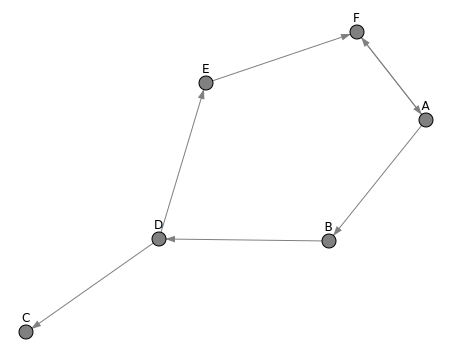

In [10]:
image = skn.visualization.graphs.visualize_graph(adjacency = graph.adjacency, names = graph.names, name_position="above")
SVG(image)

In [11]:
class Graph(object):

  def __init__(self, edges: List[Tuple]) -> None:
    nodes = set()
    in_degrees = {}
    out_degrees = {}
    for edge in edges:
      nodes.update(list(edge))
      src, dst = edge
      try:
        out_degrees[src] += 1
      except:
        out_degrees[src] = 1
      try:
        in_degrees[dst] += 1
      except:
        in_degrees[dst] = 1

    nodes = list(nodes)
    nodes.sort()
    self.edges = edges
    self.nodes = nodes
    self.in_degrees = in_degrees
    self.out_degrees = out_degrees
    self.num_nodes = len(nodes)
    self.num_edges = len(edges)

  def build_adjacency(self) -> np.array:
    O = np.zeros((self.num_nodes, self.num_nodes))
    for edge in self.edges:
      src, dst = edge
      O[self.nodes.index(dst), self.nodes.index(src)] += 1
    return O

  def build_out_degree_matrix(self) -> np.array:
    D = np.zeros((self.num_nodes, self.num_nodes))
    for node in self.nodes:
      try:
        D[self.nodes.index(node), self.nodes.index(node)] = 1/self.out_degrees[node]
      except:
        pass
    return D

  def get_modified_adjacency(self) -> np.array:
    return self.build_adjacency() @ self.build_out_degree_matrix()

  def get_edges(self) -> List[Tuple]:
    return self.edges

  def get_nodes(self) -> List:
    return self.nodes

  def get_in_degrees(self) -> dict:
    return self.in_degrees

  def get_out_degrees(self) -> dict:
    return self.out_degrees

  def get_num_nodes(self) -> int:
    return self.num_nodes

  def get_num_edges(self) -> int:
    return self.num_edges

In [12]:
class PageRank(object):

  def __init__(self, damping_factor: float = 0.9, epsilon: float = 1e-8) -> None:
    self.damping_factor = damping_factor
    self.epsilon = epsilon

  def init_page_rank(self, graph: Graph) -> np.array:
    return np.ones((graph.get_num_nodes(), 1)) / graph.get_num_nodes()

  def identity_vector(self, graph: Graph) -> np.array:
    return np.ones((graph.get_num_nodes(), 1))

  def update_page_rank(self, P1: np.array, I: np.array, graph: Graph) -> np.array:
    P2 = (
        self.damping_factor * (graph.get_modified_adjacency() @ P1)
        + (1 - self.damping_factor) * I/graph.get_num_nodes()
    )
    return P2

  def evaluate(self, graph: Graph) -> dict:
    nodes = graph.get_nodes()
    P1 = self.init_page_rank(graph)
    I = self.identity_vector(graph)
    P2 = self.update_page_rank(P1, I, graph)
    while np.linalg.norm(P2 - P1) >= self.epsilon:
      P1 = P2
      P2 = self.update_page_rank(P1, I, graph)
    page_ranks = {}
    for node, rank in zip(nodes, P2.flatten()):
      page_ranks[node] = rank
    return page_ranks

In [13]:
graph = Graph(edges)
pr = PageRank()
ranks = pr.evaluate(graph)

ranks

{'A': 0.12675911960522362,
 'B': 0.07370827299621358,
 'C': 0.05401851997791911,
 'D': 0.08300411511415294,
 'E': 0.05401851997791911,
 'F': 0.12232494263254401}

In [14]:
from sknetwork.ranking import PageRank

In [19]:
graph = skn.data.from_edge_list(edges, directed = True)
adjacency = graph.adjacency
page_rank = PageRank(damping_factor = 0.9, tol = 1e-8)
ranks = page_rank.fit_predict(adjacency)
ranks

array([0.21001094, 0.12342979, 0.24441885, 0.13461955, 0.08308759,
       0.20443328])